In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 
                  'tau_reio', 'sum_mnu', 'w0_fld', 'wa_fld', 'Omega_k'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 
                    0.06, 0.06, -1,   0,   0])
left_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.00, 0.01, 0.05, 0.015])
right_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.01, 0.01, 0.05, 0.015])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'no',
                   'Omega_Lambda' : 0.0}
classy_template.update(fishchips.util.PRECISE_CLASS_DICT)

# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial',
                  classy_dict=fishchips.util.neutrino_dict(classy_template))

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left', 
                      classy_dict=fishchips.util.neutrino_dict(classy_left))
    obs.compute_cosmo(key=par + '_CLASS_right',
                      classy_dict=fishchips.util.neutrino_dict(classy_right))
    

In [ ]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 
                  'tau_reio', 'sum_mnu', 'w0_fld', 'wa_fld', 'Omega_k'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 
                    0.06, 0.06, -1,   0,   0])
left_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.00, 0.1, 0.05, 0.015])
right_steps = np.array([0.0001,    0.001,    0.01,   0.01e-9, 0.005, 
                    0.02, 0.01, 0.1, 0.05, 0.015])

big_obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'no',
                   'Omega_Lambda' : 0.0}
classy_template.update(fishchips.util.PRECISE_CLASS_DICT)

# generate the fiducial cosmology
big_obs.compute_cosmo(key='CLASS_fiducial',
                  classy_dict=fishchips.util.neutrino_dict(classy_template))

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(big_obs.parameters, big_obs.left, big_obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    big_obs.compute_cosmo(key=par + '_CLASS_left', 
                      classy_dict=fishchips.util.neutrino_dict(classy_left))
    big_obs.compute_cosmo(key=par + '_CLASS_right',
                      classy_dict=fishchips.util.neutrino_dict(classy_right))
    

In [ ]:
s4 = fishchips.experiments.get_S4()

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{sum\\_mnu}$', '$\\mathrm{w0\\_fld}$', '$\\mathrm{wa\\_fld}$', '$\\mathrm{Omega\\_k}$']
1 sigma w constraint, 0.0019443112621082136


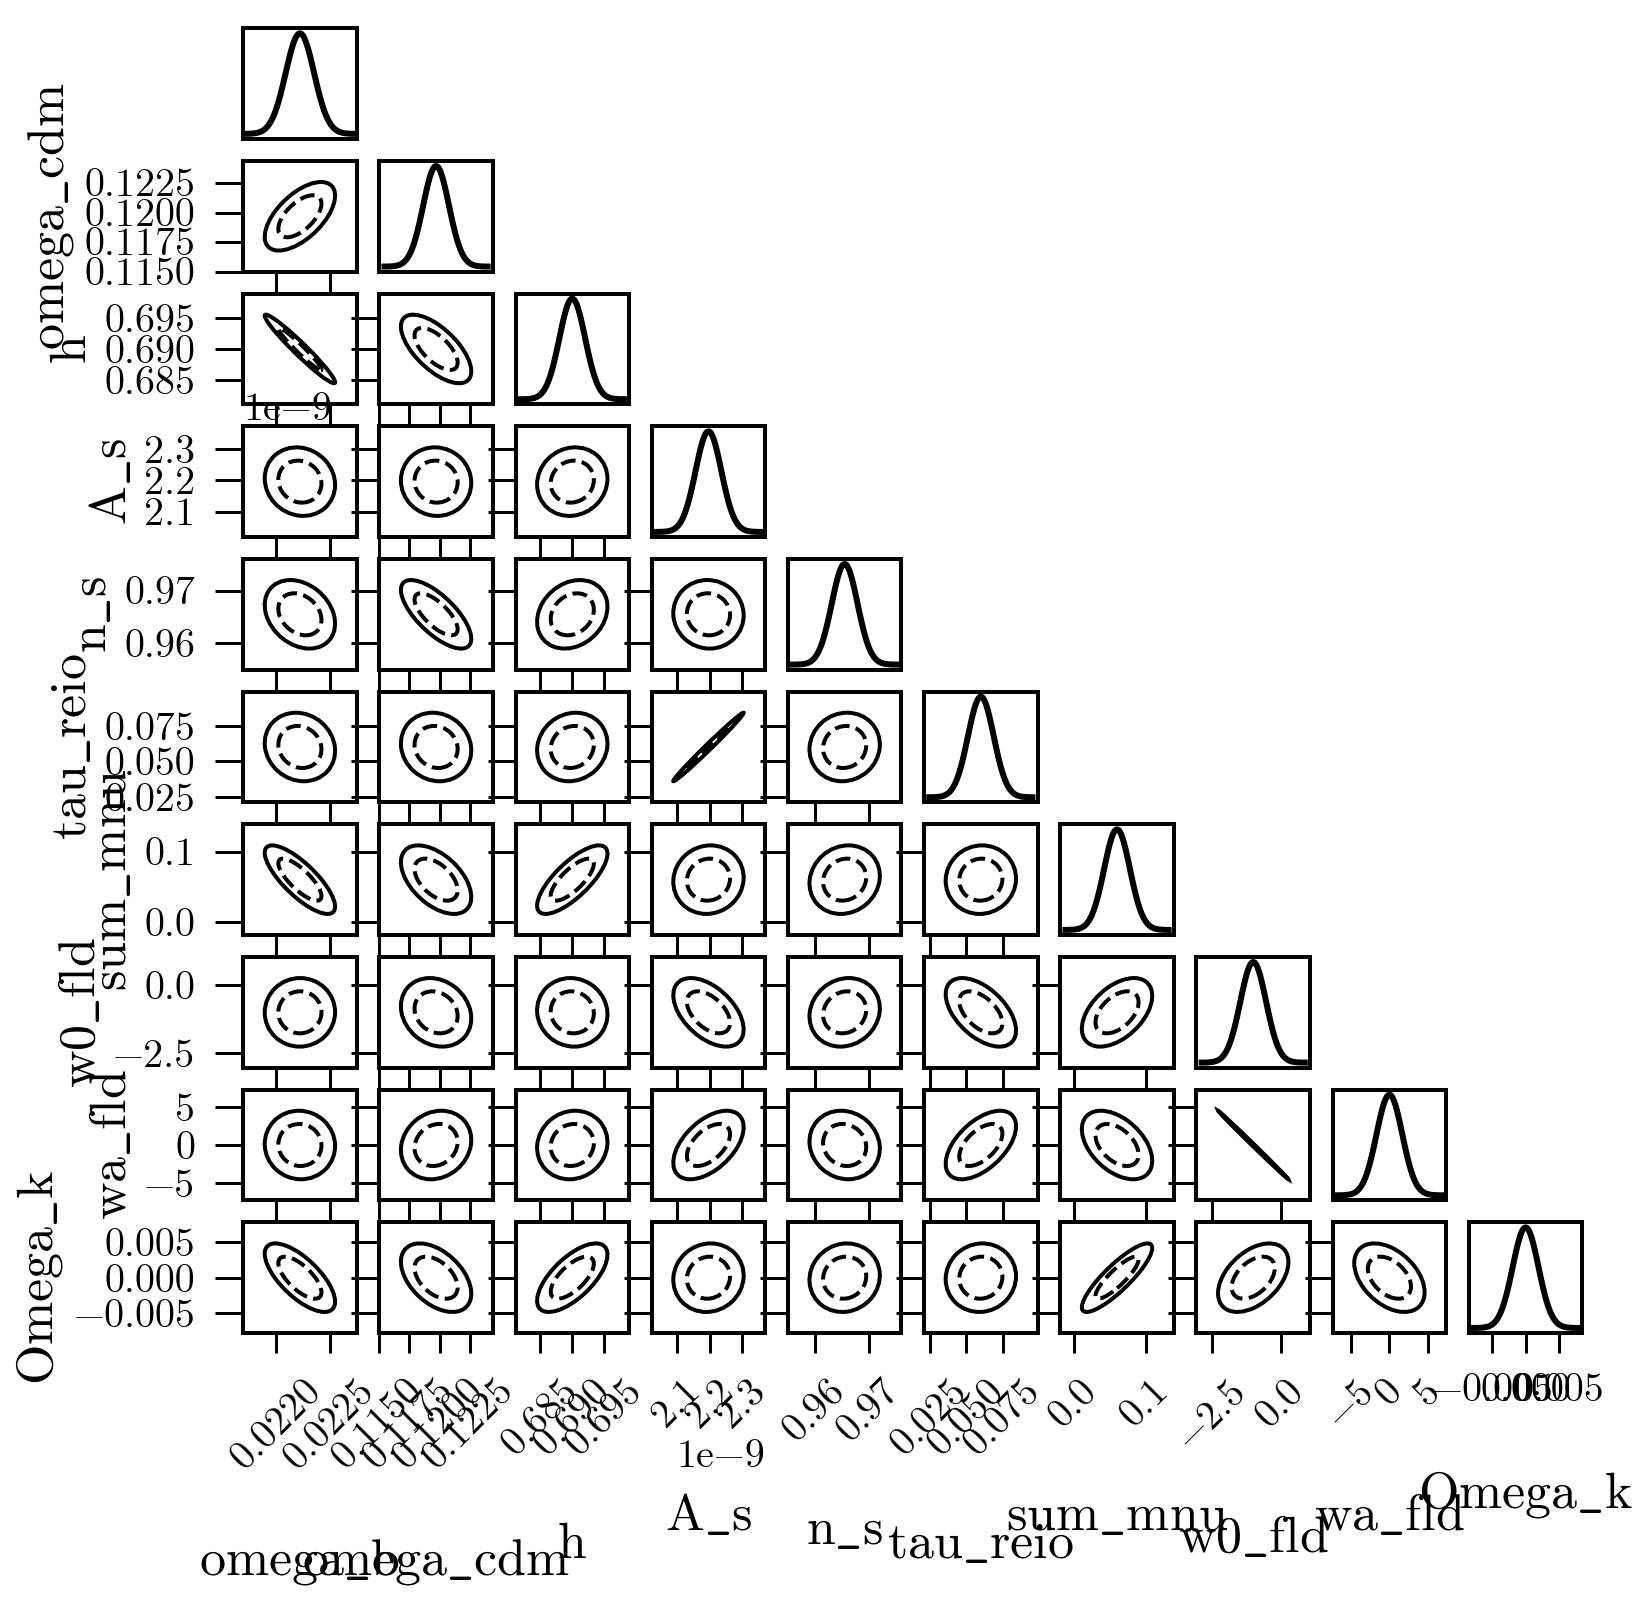

In [23]:
fisher = np.sum( [exp.get_fisher(obs, lensed_Cl=True) for exp in s4], axis=0 )
cov = np.linalg.inv(fisher)
fig, ax = fishchips.util.plot_triangle(obs, cov);
print('1 sigma w constraint,', np.sqrt( cov[-1,-1] ))

In [16]:
fisher = np.sum( [exp.get_fisher(obs, lensed_Cl=True) for exp in s4], axis=0 )
cov = np.linalg.inv(fisher)

In [17]:
for a, b in zip(pars,np.diag(cov)):
    print(a, b)

omega_b 1.7408860246612265e-08
omega_cdm 1.3655842585931352e-06
h 4.887573995617884e-06
A_s 1.914244787742398e-21
n_s 6.845677309046848e-06
tau_reio 9.425476578754516e-05
sum_mnu 0.0003910476335132147
w0_fld 0.2615713345722532
wa_fld 3.331933269673703
Omega_k 3.7803462839608343e-06
